# Метод опорных векторов

Рассмотрим один из самых известных методов построения линейных классификаторов и, наверное, один из самых известных методов в машинном обучении вообще - это метод опорных векторов.

## Задача обучения линейного классификатора

__Дано__:

Обучающая выборка $X^l = (x_i, y_i)_{i=1}^{l}$,

$x_i$ - объекты, векторы из множества $X = \mathbb{R}^n$,

$y_i$ - метки классов, элементы множества $Y = \{-1, +1\}$.

__Найти__:

Параметры $w \in \mathbb{R}^n, w_0 \in \mathbb{R}$ линейной модели классификации

$$a(x; w, w_0) = \mathrm{sign}\Big(\left\langle x, w\right\rangle - w_0\Big).$$

Скалярное произведение минус свободный член принято называть _дискриминантной функцией._ Знак дискриминантной функции показывает, к какому классу будет отнесен объект $x$. Если дискриминантная функция больше нуля, то объект относится к классу $+1$, если меньше нуля, то к классу $−1$.

Возникает задача: как по обучающей выборке определить значение параметров $w$ и $w_0$? Мы будем сводить задачу к оптимизационной. Самый простой критерий, который может быть использован, — это минимизация эмпирического риска.

__Критерий__ - минимизация эмпирического риска:

$$\sum\limits_{i=1}^{l}\Big[a(x_i; w, w_0) \neq y_i\Big] = \sum\limits_{i=1}^{l}\Big[M_i(w,w_0) < 0\Big] \rightarrow \min_{w, w_0},$$

где $M_i(w, w_0) = (\left\langle x, w\right\rangle - w_0)y_i$ - _отступ_ (margin) объекта $x_i$,

$b(x) = \left\langle x, w\right\rangle - w_0$ - _дискриминантная функция._

Если дискриминантная функция и правильный ответ одного знака, то отступ положительный, ошибки на объекте нет. Если они разного знака, то происходит ошибка на объекте, отступ отрицательный. Отступ — величина непрерывная, и интуитивно кажется, что чем меньше значение отступа, тем хуже. Чем больше значение отступа, тем дальше объект находится от разделяющей гиперплоскости, он лежит глубоко внутри своего класса, и на нем классификация надежна.

И отсюда возникает идея, чтобы мерять ошибку не как бинарную величину — отступ отрицательный или положительный, а использовать саму величину отступа. 

## Аппроксимация и регуляризация эмпирического риска

Аппроксимации могут быть разными, сейчас рассмотрим аппроксимацию кусочно-линейную, которая будет штрафовать объекты за приближение к границе между классами. И если объект переходит через границу класса, оказывается в чужом классе и продолжает двигаться дальше, то штраф будет линейно возрастать.

Эмпиричекий риск - это кусочно-постоянная функция. Заменим его оценкой сверху, непрерывной по параметрам:

$$Q(w,w_0) = \sum\limits_{i=1}^{l}\Big[M_i(w,w_0) < 0\Big] \leq \sum\limits_{i=1}^{l}\Big(1 - M_i(w, w_0)\Big)_{+} + \frac{1}{2C}||w||^2 \rightarrow \min_{w, w_0}.$$

Функционал, который мы вводим, мажорирует сверху (функционал эмпирического риска, который просто является числом ошибок на обучающей выборке). Поэтому если мы будем минимизировать наш новый функционал, то мы тем самым будем минимизировать и исходный функционал числа ошибок. 

- _Аппроксимация_ штрафует объекты за приближение к границе классов, увеличивая зазор между классами.

Кроме аппроксимации пороговой функции потерь кусочно-линейной непрерывной функции, можно ввести еще одну оценку сверху на функционал в виде штрафного слагаемого регуляризатора, который наказывает решение за слишком большую норму вектора коэффициентов. Такое штрафное слагаемое позволяет избежать проблемы переобучения, которая может возникнуть из-за мультиколлинеарности, когда среди признаков есть линейно-зависимые. 

- _Регуляризация_ штрафует неустойчивые решения в случае мультиколлинеарности.

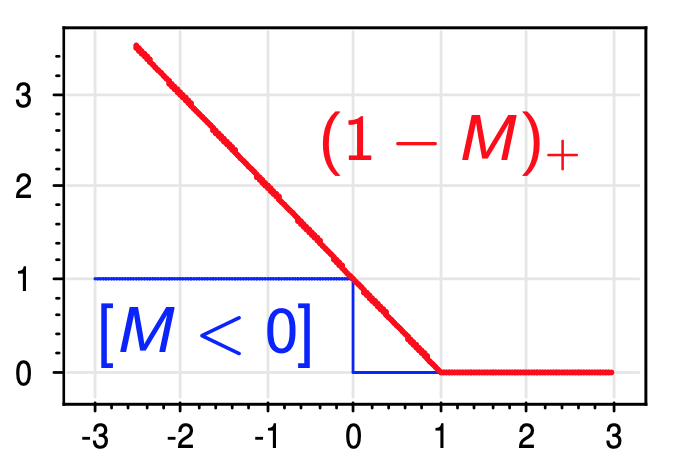

In [2]:
from IPython.display import Image
Image(filename='images/3.1 Метод опорных векторов/image_1.png')

Это одно обоснование вот такой оптимизационной задачи. Есть другое обоснование, которое сейчас приведет ровно к тому же самому функционалу. 

## Оптимальная разделяющая гиперплоскость

Линейный классификатор:

$$a(x, w) = \mathrm{sign}(\left\langle w, x\right\rangle - w_0), w \in \mathbb{R}^n, w_0 \in \mathbb{R}.$$

Пусть выборка $X^l = (x_i, y_i)_{i=1}^{l}$ линейно разделима:

$$\exists w, w_0 : M_i(w, w_0) = y_i(\left\langle w, x_i\right\rangle - w_0) > 0,\ i = 1, \ldots, l.$$

Это означает, что мы точно знаем, что существует такой вектор w и скаляр w0, что все отступы строго положительные. То есть можно так поделить выборку, что ни на одном объекте ошибки не будет.

Заметим, что условие положительности всех отступов определено с точностью до нормировки. Мы можем домножить линейную дискриминантную функцию на любую неотрицательную константу, и система уравнений, которая определяет условие, что все отступы положительные, она не изменится. Каждое уравнение в этой системе можно умножить на положительное число. Распорядимся этой свободой выбора нормировочной константы таким образом, чтобы минимальный отступ был равен $1$.

Нормировка: $\min_{i=1,\ldots,l}M_i(w, w_0) = 1.$

И дальше потребуем дополнительного условия оптимальности разделяющей гиперплоскости. Будем строить ее таким образом, чтобы зазор или полоса, разделяющая классы, оказалась максимальной ширины. Как это сделать? Во-первых, очевидно, что мы должны провести разделяющую гиперплоскость ровно посередине такой полосы. Во-вторых, из принципа оптимальности следует, что эта полоса обязана упереться своими краями в объекты обоих классов. 

Вот если мы потребуем максимальности ширины разделяющей полосы, то из этого условия будет следовать существование хотя бы одного объекта класса $−1$, на котором отступ равен $1$ (это значит, дискриминантная функция равна $−1$), и хотя бы одного объекта класса $+1$, на котором дискриминантная функция будет равна $+1$, и соответственно, тоже отступ равен $1$. 

Разделяющая полоса:

$$\{x: -1 \leq \left\langle w, x\right\rangle - w_0 \leq 1\}.$$

Вот из этих условий будет следовать, что ширина полосы может быть вычислена как $2$ поделить на норму вектора $w$ — направляющего вектора разделяющей гиперплоскости. И отсюда следует уже аналитический принцип оптимальности. Если мы хотим, чтобы полоса была максимальной ширины, мы должны минимизировать норму вектора $w$.

Ширина полосы:

$$\frac{\left\langle x_{+} - x_{-}, w\right\rangle}{||w||} = \frac{2}{||w||} \rightarrow \max.$$

## Переход к линейно неразделимой выборке

Постановка задачи в случае линейно разделимой выборки:

$$ \begin{cases}
   \frac{1}{2}||w||^2 \rightarrow \min_{w, w_0};
   \\
   M_i(w, w_0) \geq 1,\  i = 1,\ldots,l.
 \end{cases}$$
 
Мы ослабляем неравенство. Вводим дополнительные неотрицательные переменные $\xi_i$-тое, которые можно рассматривать как штраф за нарушение неравенства.
 
Общий случай - линейно неразделимая выборка:

$$ \begin{cases}
   \frac{1}{2}||w||^2 + C\sum\limits_{i=1}^{l}\xi_i \rightarrow \min_{w, w_0, \xi};
   \\
   M_i(w, w_0) \geq 1 - \xi_i,\  i = 1,\ldots,l;
   \\
   \xi_i \geq 0,\ i = 1,\ldots,l.
 \end{cases}$$
 
Но мы хотели бы, чтобы эти штрафы были бы как можно меньше в сумме. Поэтому мы вводим дополнительное слагаемое сумму штрафов, как добавку к нашему исходному функционалу. И получаем вот такую постановку задачи, которая теперь уже всегда имеет решение. И можно ее решать численными методами.

Исключая $\xi_i$, получаем задачу безусловной минимизации:

$$C\sum\limits_{i=1}^{l}(1 - M_i(w, w_0))_{+} + \frac{1}{2}||w||^2 \rightarrow \min_{w, w_0}.$$

Эта постановка задачи эквивалента той, которую мы изначально вывели из принципов аппроксимации и регуляризации эмпирического риска.

Как эту задачу решать. Задача, которая выписана в виде единого функционала без дополнительных переменных $\xi_i$, она неудобна тем, что функционал в ней не гладкий. Поэтому принято решать задачу, которая представлена в виде квадратичного гладкого функционала с дополнительными переменными $\xi_i$, но зато функционал здесь гладкий, ограничения гладкие, поэтому мы можем воспользоваться стандартным методом решения задач математического программирования, а именно условиями Каруша-Куна-Таккера.

## Условия Каруша-Куна-Таккера

Задача математического программирования:

$$ \begin{cases}
   f(x) \rightarrow \min_{x};
   \\
   g_i(x) \leq 0,\  i = 1,\ldots,m;
   \\
   h_j(x) = 0,\ j = 1,\ldots, k.
 \end{cases}$$
 
Необходимые условия. Если $x$ - точка локального минимума, то существуют множители $\mu_i, i=1,\ldots,m, \lambda_j, j=1,\ldots,k$:

$$\begin{cases}
   \frac{\partial \mathscr{L}}{\partial x} = 0,\ \mathscr{L}(x;\mu, \lambda) = f(x) + \sum\limits_{i=1}^{m}\mu_i g_i(x) + \sum\limits_{j=1}^{k}\lambda_j h_j(x);
   \\
   g_i(x) \leq 0,\  h_j(x) = 0;\ \text{(исходные ограничения)}
   \\
   \mu_i \geq 0; \text{(двойственные ограничения)}
   \\
   \mu_i g_i(x) = 0; \text{(условие дополняющей нажёсткости)}
 \end{cases}$$

## Применение условий ККТ к задаче SVM

Функция Лагранжа:

$$\mathscr{L}(w, w_0, \xi; \lambda, \eta) = \frac{1}{2}||w||^2 - \sum\limits_{i=1}^{l}\lambda_i\Big(M_i(w,w_0) - 1\Big) - \sum\limits_{i=1}^{l}\xi_i(\lambda_i + \eta_i - C),$$

$\lambda_i$ - переменные, двойственные к ограничениям $M_i \geq 1 - \xi_i$;

$\eta_i$ - переменные, двойственные к ограничениям $\xi_i \geq 0$.

Условия ККТ:

$$\begin{cases}
   \frac{\partial \mathscr{L}}{\partial w} = 0,\ \frac{\partial \mathscr{L}}{\partial w_0} = 0,\ \frac{\partial \mathscr{L}}{\partial \xi} = 0;
   \\
   \xi_i \geq 0,\  \lambda_i \geq 0,\ \eta_i \geq 0,\ i = 1,\ldots,l;
   \\
   \lambda_i = 0 \text{ либо } M_i(w, w_0) = 1-\xi_i,\ i = 1,\ldots,l;
   \\
   \eta_i = 0 \text{ либо } \xi_i = 0,\ i = 1,\ldots,l.
 \end{cases}$$

## Двойственная задача

Если все эти условия выписать, то мы приходим к новой системе уравнений, которая называется двойственной задачей. 

$$\begin{cases}
   -\sum\limits_{i=1}^{l}\lambda_1;
   \\
   \xi_i \geq 0,\  \lambda_i \geq 0,\ \eta_i \geq 0,\ i = 1,\ldots,l;
   \\
   \lambda_i = 0 \text{ либо } M_i(w, w_0) = 1-\xi_i,\ i = 1,\ldots,l;
   \\
   \eta_i = 0 \text{ либо } \xi_i = 0,\ i = 1,\ldots,l.
 \end{cases}$$

Это снова задача минимизации, но теперь она содержит только двойственные переменные $\lambda$, на которые есть ограничения неравенств очень простого вида, которые говорят, что все $l$ переменных $\lambda$ должны оказаться в кубе со стороной равной $C$. И осталось еще одно ограничение равенства. Это задача квадратичного программирования. Для нее существуют стандартные способы решения, но также разработаны и нестандартные, которые существенно эксплуатируют некоторые специфические особенности именно этой конкретной постановки задачи квадратичного программирования. Мы не будем углубляться в то, как эта задача решается, а заметим, что если у нас есть какой-то способ стандартный решения этой задачи, то он нам даст значение переменных λ, мы сможем их подставить в выражение для вектора w и для скаляра w0, и тем самым получить готовый алгоритм классификации. Если посмотреть на этот алгоритм, то выяснится одна очень важная его особенность. Двойственные переменные λi для многих объектов будут равны нулю. И если это так случается, то от этого объекта xi-того решение, наш классификатор, зависеть не будет. Отсюда определение — объект xi называется опорным, если соответствующая ему двойственная переменная λi-тое не равна нулю. То есть скалярное произведение этого объекта с классифицируемым объектом входит в выражение для дискриминантной функции. То есть получается, что мы исходно из выборки могли бы выкинуть те объекты, которые не являются опорными, и получился бы ровно такой же классификатор.